In [1]:
import numpy as np

In [2]:
detector_array = np.zeros((500, 500))
#this shows a 2 dimensional array with 500 cells in each direction

In [3]:
print(detector_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
pixel_edge_length = 15 #microns
pixel_half_length = (pixel_edge_length / 2)
number_of_pixels = 500
number_of_pixel_x = 500
number_of_pixel_y = 500
electrons_per_photon = 1500 #electrons
#center of each pixel can be calculated by multiplying it's i or j value by 15 and adding 7.5
def bottom_left_of_pixel():
    pixel_corner_i = i * pixel_edge_length
    pixel_corner_j = j * pixel_edge_length

In [5]:
#i = the row value of pixel
#j = the column value of pixel
#horz_d= horizontal distance from bottom left
#vert_d= vertical distance from bottom left
def center_of_pixel(pixel_edge_length, i, j):
    horz_d = (i * pixel_edge_length) + pixel_half_length
    vert_d = (j * pixel_edge_length) + pixel_half_length
    #print("pixel: [" + str(i) + ", " + str(j) + "], center of pixel: [" + str(horz_d) + ", " + str(vert_d) + "] microns.")
for i in range(len(detector_array)):
    for j in range(len(detector_array)):
        center_of_pixel(pixel_edge_length, i, j)   

In [6]:
import random
x_rand = random.random() * pixel_edge_length * number_of_pixels #microns
y_rand = random.random() * pixel_edge_length * number_of_pixels #microns
print("photon hit at [x,y] = [" + str(x_rand) + ", " + str(y_rand) + "] in microns")

photon hit at [x,y] = [1948.6484634095764, 6374.5975333535125] in microns


In [7]:
 #to do: which center of pixel(s) is closest to the random generated values
#calculate percentage of cloud in each pixel based on distance from center of multiple pixels
#strategy: attempt to make a function to calculate distance from center of circle
#to the center of each of the 4 surrounding pixels and 
#relate that number to the percentage of the circle that overlaps the pixels
#x_rand and y_rand is the center point of the circle
#sqrt((x2-x1)^2 + (y2-y1)^2)
diameter_electron_cloud = 10 #microns
radius_electron_cloud = diameter_electron_cloud / 2 #microns
area_electron_cloud = np.pi * (radius_electron_cloud ** 2)
#take x_rand and y_rand to find closest pixel(s)

In [8]:
#define detector_array_x and y
detector_array_x = np.arange(500) * pixel_edge_length + pixel_half_length
detector_array_y = np.arange(500) * pixel_edge_length + pixel_half_length
#remember multiple pixels have the same center value, but this array contains all of those possibilities

In [13]:
#redefining variables to be more precise
photon_sphere_x = x_rand #microns
photon_sphere_y = y_rand #microns
photon_sphere_z= 15
photon_sphere_microns = [photon_sphere_x, photon_sphere_y, photon_sphere_z]
photon_sphere_pixel = [photon_sphere_x / pixel_edge_length, photon_sphere_y / pixel_edge_length]
print("sphere micron position " + str(photon_sphere_microns))
print("sphere pixel position " + str(photon_sphere_pixel))


sphere micron position [1948.6484634095764, 6374.5975333535125, 15]
sphere pixel position [129.90989756063843, 424.97316889023415]


In [14]:
closest_pixel_x = (np.where(np.abs(detector_array_x - photon_sphere_x) == np.min(np.abs(detector_array_x - photon_sphere_x))))[0]
closest_pixel_x [0]
closest_pixel_x_microns = closest_pixel_x [0] * pixel_edge_length + pixel_half_length
closest_pixel_y = (np.where(np.abs(detector_array_y - photon_sphere_y) == np.min(np.abs(detector_array_y - photon_sphere_y))))[0]
closest_pixel_y [0]
closest_pixel_y_microns = closest_pixel_y [0] * pixel_edge_length + pixel_half_length
closest_pixel_arr = [closest_pixel_x[0], closest_pixel_y[0]]
closest_pixel_microns = [closest_pixel_x_microns, closest_pixel_y_microns]
print("closest pixel to sphere: " + str(closest_pixel_arr))
print("closest pixel's center in microns: " + str(closest_pixel_microns))

closest pixel to sphere: [129, 424]
closest pixel's center in microns: [1942.5, 6367.5]


In [15]:
#measure the distance from closest_pixel_microns to photon_sphere_microns in x and y directions
#all variables here are measured in microns
dist_sphere_pixel_x = np.abs(closest_pixel_x_microns - photon_sphere_x)
dist_sphere_pixel_y = np.abs(closest_pixel_y_microns - photon_sphere_y)
total_dist_sphere_pixel = np.sqrt((dist_sphere_pixel_x ** 2) + (dist_sphere_pixel_y ** 2))
print("distnace in x: " + str(dist_sphere_pixel_x) + " microns, " + "distance in y: " + str(dist_sphere_pixel_y) + " microns")
print("total distance from center of sphere to center of pixel: " + str(total_dist_sphere_pixel) + " microns")

distnace in x: 6.1484634095763795 microns, distance in y: 7.097533353512517 microns
total distance from center of sphere to center of pixel: 9.390345148242542 microns


In [12]:
#use distance values and write a if, ifelse etc statement to solve for when the circle is:
#contained within the pixel, intersected by one line (in y or x), or  intersected by 2 lines (in y and x)
electrons_per_photon = 1500 #electrons
max_dist_from_center = (pixel_edge_length - diameter_electron_cloud) / 2
if (dist_sphere_pixel_x < max_dist_from_center and dist_sphere_pixel_y < max_dist_from_center):
    print('photon contained within pixel ' + str(closest_pixel_arr))
    detector_array [closest_pixel_x, closest_pixel_y] = electrons_per_photon
elif (dist_sphere_pixel_x >= max_dist_from_center and dist_sphere_pixel_y < max_dist_from_center):
    print('photon bisected by vertical line')
#vertical line means we need to use the x distance to find the are or % of sphere that spills into next pixel
elif (dist_sphere_pixel_y >= max_dist_from_center and dist_sphere_pixel_x < max_dist_from_center):
    print('photon bisected by horizontal line')
else (dist_sphere_pixel_y >= max_dist_from_center and dist_sphere_pixel_x >= max_dist_from_center):
    
    


SyntaxError: invalid syntax (<ipython-input-12-0b766b217fa3>, line 13)

In [45]:
sm_pixel_edge_length = .1 #microns
sm_pixel_half_length = sm_pixel_edge_length/2 #microns
sm_number_of_pixels = 300
sm_array=np.zeros((sm_number_of_pixels,sm_number_of_pixels,sm_number_of_pixels))
sm_x_cen = np.arange(sm_number_of_pixels)*sm_pixel_edge_length+(detector_array_x[closest_pixel_x]-pixel_half_length) + sm_pixel_edge_length
sm_y_cen = np.arange(sm_number_of_pixels)*sm_pixel_edge_length+(detector_array_y[closest_pixel_y]-pixel_half_length) + sm_pixel_edge_length   

sm_x_cen

In [46]:
sm_x_cen

array([1935.1, 1935.2, 1935.3, 1935.4, 1935.5, 1935.6, 1935.7, 1935.8,
       1935.9, 1936. , 1936.1, 1936.2, 1936.3, 1936.4, 1936.5, 1936.6,
       1936.7, 1936.8, 1936.9, 1937. , 1937.1, 1937.2, 1937.3, 1937.4,
       1937.5, 1937.6, 1937.7, 1937.8, 1937.9, 1938. , 1938.1, 1938.2,
       1938.3, 1938.4, 1938.5, 1938.6, 1938.7, 1938.8, 1938.9, 1939. ,
       1939.1, 1939.2, 1939.3, 1939.4, 1939.5, 1939.6, 1939.7, 1939.8,
       1939.9, 1940. , 1940.1, 1940.2, 1940.3, 1940.4, 1940.5, 1940.6,
       1940.7, 1940.8, 1940.9, 1941. , 1941.1, 1941.2, 1941.3, 1941.4,
       1941.5, 1941.6, 1941.7, 1941.8, 1941.9, 1942. , 1942.1, 1942.2,
       1942.3, 1942.4, 1942.5, 1942.6, 1942.7, 1942.8, 1942.9, 1943. ,
       1943.1, 1943.2, 1943.3, 1943.4, 1943.5, 1943.6, 1943.7, 1943.8,
       1943.9, 1944. , 1944.1, 1944.2, 1944.3, 1944.4, 1944.5, 1944.6,
       1944.7, 1944.8, 1944.9, 1945. , 1945.1, 1945.2, 1945.3, 1945.4,
       1945.5, 1945.6, 1945.7, 1945.8, 1945.9, 1946. , 1946.1, 1946.2,
      

In [29]:
detector_array_x[closest_pixel_x]

array([1942.5])

In [30]:
sm_y_cen

array([6361., 6362., 6363., 6364., 6365., 6366., 6367., 6368., 6369.,
       6370., 6371., 6372., 6373., 6374., 6375., 6376., 6377., 6378.,
       6379., 6380., 6381., 6382., 6383., 6384., 6385., 6386., 6387.,
       6388., 6389., 6390.])

In [47]:
sm_z_cen = np.arange(sm_number_of_pixels)*sm_pixel_edge_length

In [48]:
for i in range(sm_number_of_pixels):
    for j in range(sm_number_of_pixels):
        for k in range(sm_number_of_pixels):
            distance_to_center_of_photon = np.sqrt((sm_x_cen[i]-photon_sphere_x)**2 + \
                                                (sm_y_cen[j]-photon_sphere_y)**2 + \
                                                (sm_z_cen[k]-photon_sphere_z)**2)
            if distance_to_center_of_photon < diameter_electron_cloud/2:
                sm_array[i,j,k] = 1.

In [33]:
%matplotlib inline

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

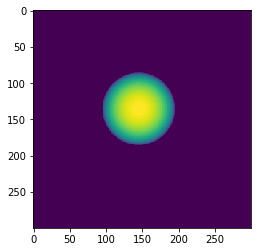

In [50]:
img = np.sum(sm_array,axis=2)
imgplot = plt.imshow(img)

In [51]:
np.sum(img)



523526.0

In [39]:
percent_in_first_pixel = np.sum(img[0:14,0:14])/np.sum(img)

In [40]:
percent_in_first_pixel


0.4781783681214421

In [44]:
detector_array[closest_pixel_x,closest_pixel_y]+= percent_in_first_pixel*electrons_per_photon